<a href="https://colab.research.google.com/github/dho619/TCC_Pos_IA/blob/main/AnaliseExploracaoDosDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('./Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo TratamentoDosDados.ipynb
def TratarDadosBaseWalmart(df):
  df.Date=pd.to_datetime(df.Date, format='%d-%m-%Y')
  df['Day'] = df.Date.dt.day
  df['Month'] = df.Date.dt.month
  df['Year'] = df.Date.dt.year
  df.drop(['Date'], axis=1, inplace=True)

  df.drop_duplicates(inplace=True)

  ignoreFeatures = ['Weekly_Sales', 'Day']
  maximumToBeCategorical = 45
  features = [i for i in df.columns if i not in ignoreFeatures]
  uniqueValuesForFeature = df[features].nunique().sort_values()
  categoricalFeature = [];
  valuesFeature = [];
  for i in range(df[features].shape[1]):
      if uniqueValuesForFeature.values[i]<=maximumToBeCategorical:
          categoricalFeature.append(uniqueValuesForFeature.index[i])
      else:
          valuesFeature.append(uniqueValuesForFeature.index[i])
  for i in categoricalFeature:
    if df[i].nunique()==2:
        df[i]=pd.get_dummies(df[i], drop_first=True, prefix=str(i))
    if (df[i].nunique()>2):
        df = pd.concat([df.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df[i], prefix=str(i)))],axis=1)
    
  return df

In [5]:
#fazendo uma cópia para manter um original intacto
df_original = df.copy(deep=True)

### Criando df para exibir informações de vendas em todas lojas juntas

In [6]:
df = df_original.copy(deep=True)
df['Date2']=pd.to_datetime(df.Date, format='%d-%m-%Y')
df['MonthYear'] = df.Date2.dt.to_period('M').astype(str)
df.sort_values(by=['MonthYear'],inplace=True)
df['MonthYear'].unique()

array(['2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07',
       '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01',
       '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07',
       '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01',
       '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07',
       '2012-08', '2012-09', '2012-10'], dtype=object)

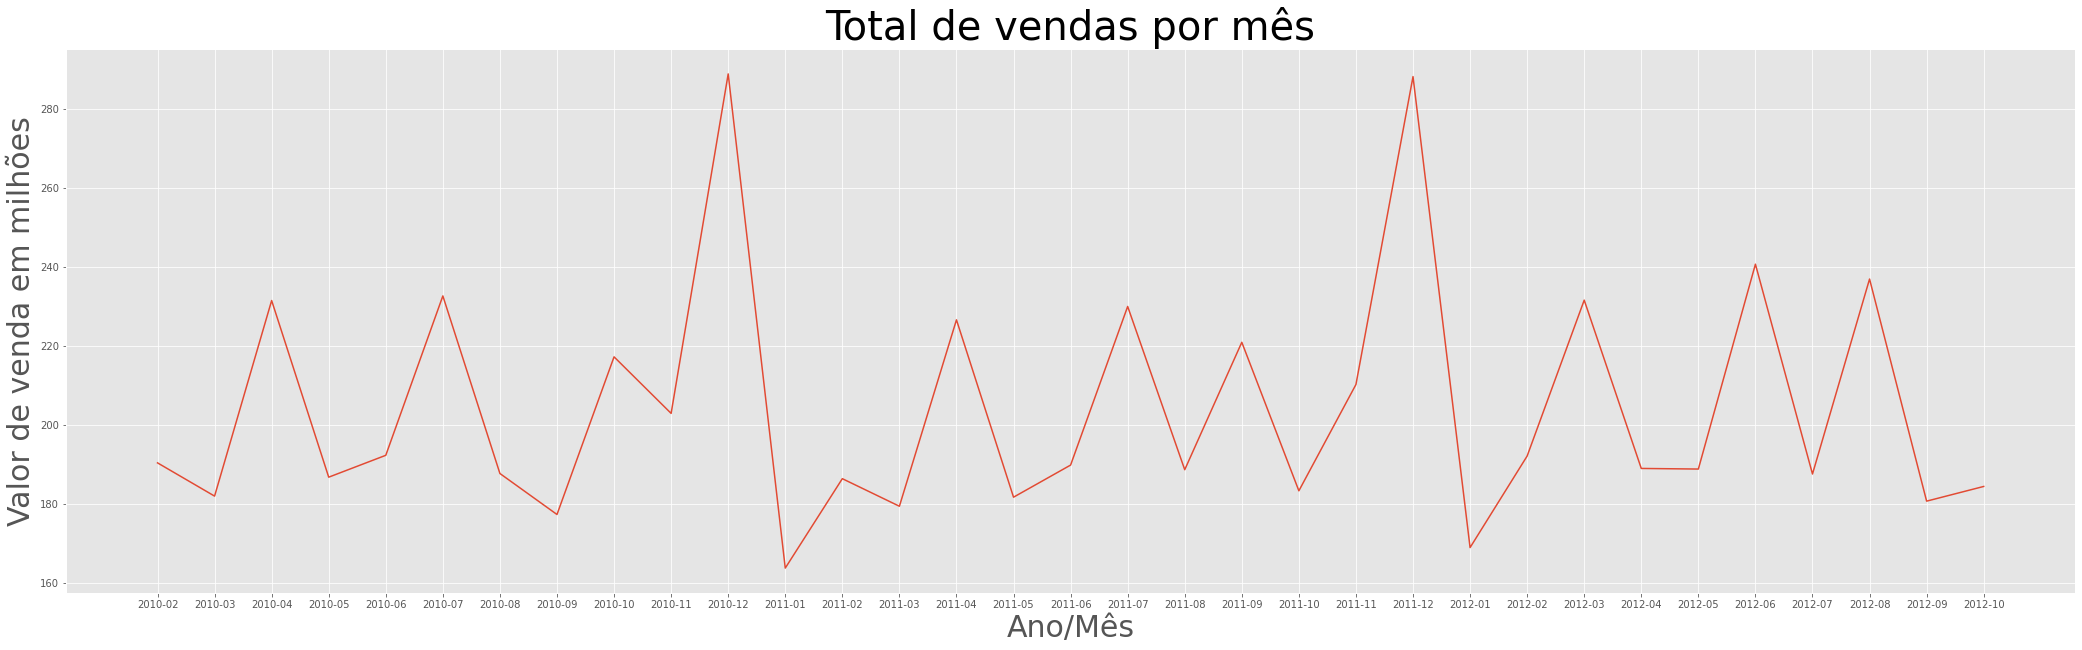

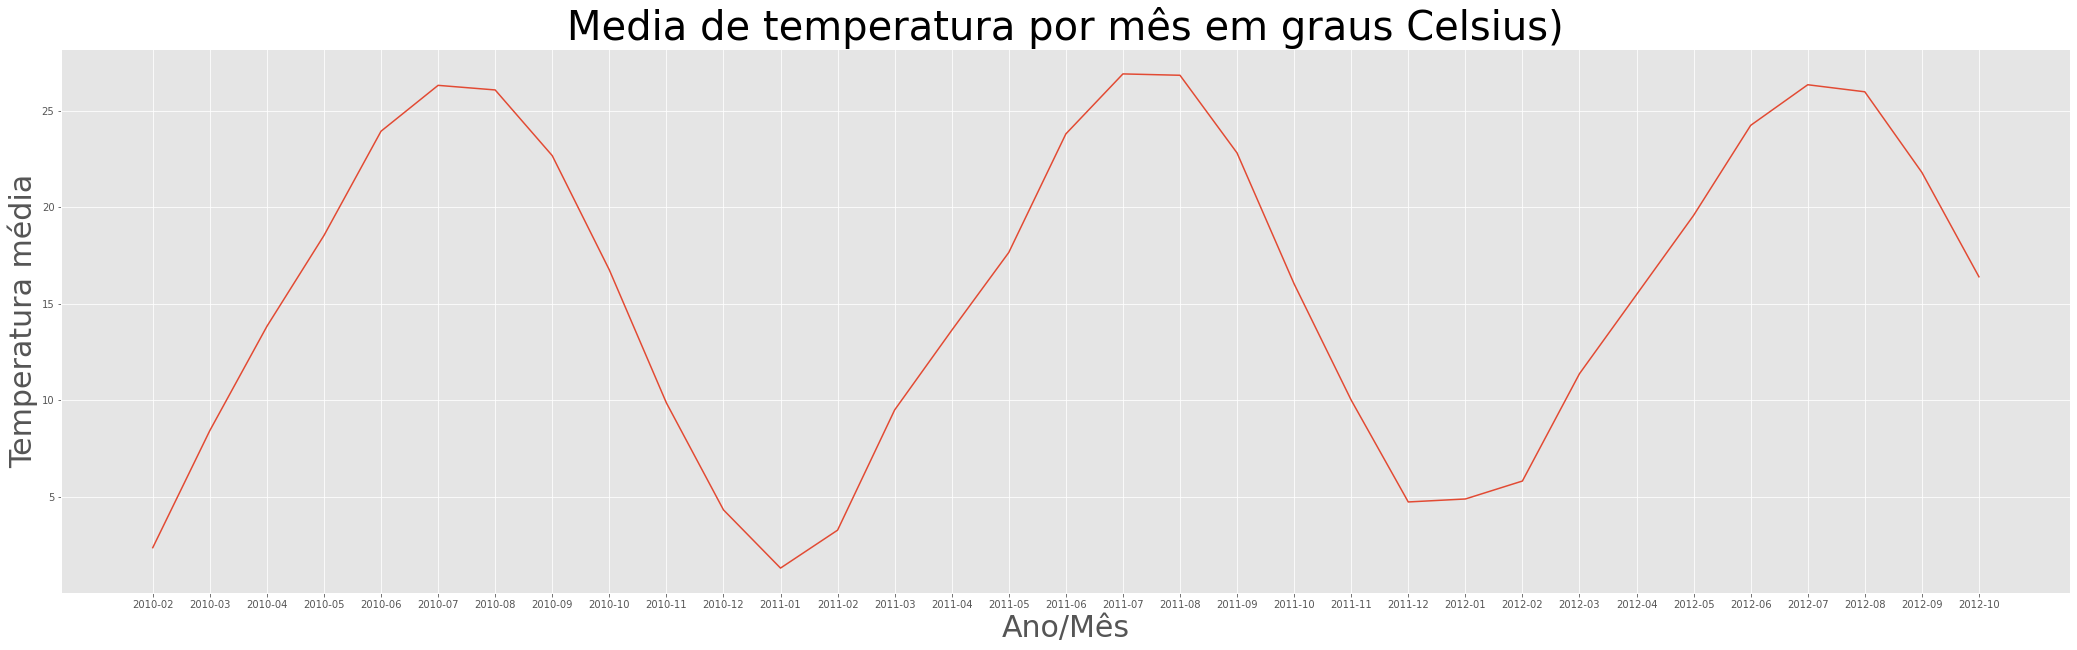

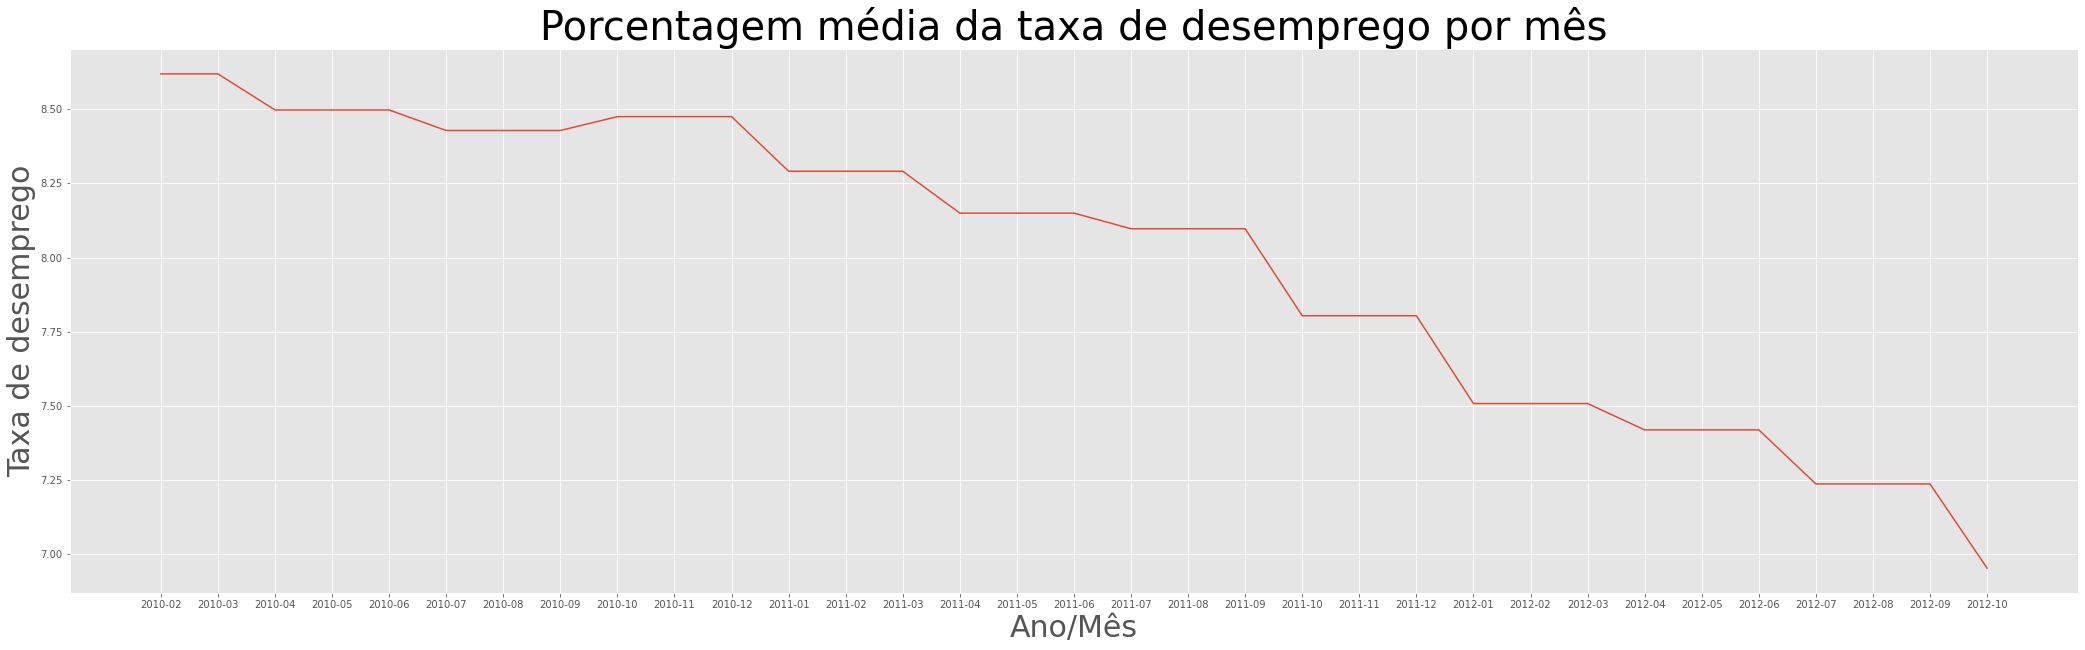

In [16]:
plt.style.use("ggplot")
figure1 = plt.figure("Figure 1", figsize = (36, 10))
plt.plot(df['MonthYear'].unique(), df.groupby(['MonthYear']).sum()['Weekly_Sales']/1000000)
plt.title("Total de vendas por mês", fontsize=40)
plt.xlabel("Ano/Mês", fontsize=30)
plt.ylabel("Valor de venda em milhões", fontsize=30)

figure2 = plt.figure("Figure 2", figsize = (36, 10))
plt.plot(df['MonthYear'].unique(), df.groupby(['MonthYear']).mean()['Temperature'].apply(lambda x: (x-32)/1.8))
plt.title("Media de temperatura por mês em graus Celsius)", fontsize=40)
plt.xlabel("Ano/Mês", fontsize=30)
plt.ylabel("Temperatura média", fontsize=30)

figure3 = plt.figure("Figure 3", figsize = (36, 10))
plt.plot(df['MonthYear'].unique(), df.groupby(['MonthYear']).mean()['Unemployment'])
plt.title("Porcentagem média da taxa de desemprego por mês", fontsize=40)
plt.xlabel("Ano/Mês", fontsize=30)
plt.ylabel("Taxa de desemprego", fontsize=30)

plt.show()

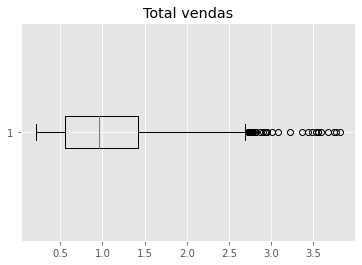

In [17]:
#Box plot por valor
# print("BoxPlot vendas em milhões")
# figure1 = plt.figure("Figure 1")
# plt.boxplot(df.groupby(['MonthYear']).sum()['Weekly_Sales']/1000000, vert=False)
# plt.title("Total vendas por mês")

figure2 = plt.figure("Figure 2")
plt.boxplot(df['Weekly_Sales']/1000000, vert=False)
plt.title("Total vendas")

plt.show()

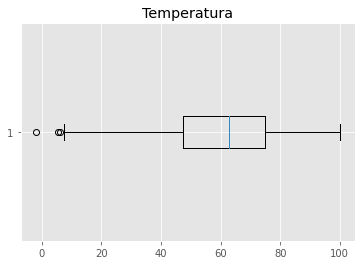

In [18]:
# print("BoxPlot Temperatura em Graus Celsius")
# figure1 = plt.figure("Figure 1")
# plt.boxplot(df.groupby(['MonthYear']).mean()['Temperature'], vert=False)
# plt.title("Temperatura média por mês")

figure2 = plt.figure("Figure 2")
plt.boxplot(df['Temperature'], vert=False)
plt.title("Temperatura")

plt.show()

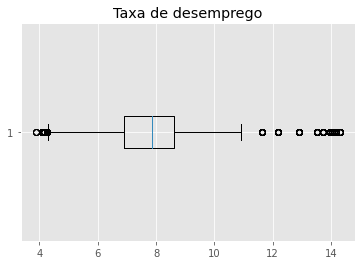

In [19]:
# print("BoxPlot porcentagem da taxa de desemprego")
# figure1 = plt.figure("Figure 1")
# plt.boxplot(df.groupby(['MonthYear']).mean()['Unemployment'], vert=False)
# plt.title("Média de taxa de desemprego por mês")

figure2 = plt.figure("Figure 2")
plt.boxplot(df['Unemployment'], vert=False)
plt.title("Taxa de desemprego")

plt.show()

In [11]:
# agrupando por mês primeiro, para pegar a média e soma por mês
df2 = df.groupby(['MonthYear']).sum()
df3 = df.groupby(['MonthYear']).mean()

#Exibindo as estastísticas de todo período agrupado por mês
print('Informações sobre média de vendas por mês em milhões, em relação a todas lojas:\n\tMédia: {}\n\tMínimo: {}\n\tMáximo: {}\n'.format(df2['Weekly_Sales'].mean()/1000000, df2['Weekly_Sales'].min()/1000000, df2['Weekly_Sales'].max()/1000000))
print('Informações sobre média de temperatura por mês, em relação a todas lojas:\n\tMédia: {}\n\tMínimo: {}\n\tMáximo: {}\n'.format(df3['Temperature'].apply(lambda x: (x-32)/1.8).mean(), df3['Temperature'].apply(lambda x: (x-32)/1.8).min(), df3['Temperature'].apply(lambda x: (x-32)/1.8).max()))
print('Informações sobre taxa de desemprego por mês, em relação a todas lojas:\n\tMédia: {}\n\tMínimo: {}\n\tMáximo: {}\n'.format(df3['Unemployment'].mean(), df3['Unemployment'].min(), df3['Unemployment'].max()))

Informações sobre média de vendas por mês em milhões, em relação a todas lojas:
	Média: 204.1581511245455
	Mínimo: 163.70396683
	Máximo: 288.76053272

Informações sobre média de temperatura por mês, em relação a todas lojas:
	Média: 15.805122895622892
	Mínimo: 1.3262345679012337
	Máximo: 26.896098765432093

Informações sobre taxa de desemprego por mês, em relação a todas lojas:
	Média: 7.997630303030304
	Mínimo: 6.953711111111111
	Máximo: 8.619311111111111



### Informações da base pós tratamento do módulo anterior

In [12]:
df_tratado = TratarDadosBaseWalmart(df_original)
df_tratado.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Year_2010,Year_2011,Year_2012,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,...,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,0.335664,0.363636,0.300699,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,0.472259,0.481083,0.458598,...,0.147417,0.147417,0.147417,0.147417,0.147417,0.147417,0.147417,0.147417,0.147417,0.147417
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Pegar algumas informações para exibir mais alguns gráficos
ignoreFeatures = ['Day', 'Weekly_Sales']
maximumToBeCategorical = 45
features = [i for i in df_tratado.columns if i not in ignoreFeatures]
uniqueValuesForFeature = df_tratado[features].nunique().sort_values()

valuesFeature = [];
for i in range(df_tratado[features].shape[1]):
    if uniqueValuesForFeature.values[i]>maximumToBeCategorical:
        valuesFeature.append(uniqueValuesForFeature.index[i])

### Distribuição de colunas númericas em barras e boxplot para ver possíveis outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

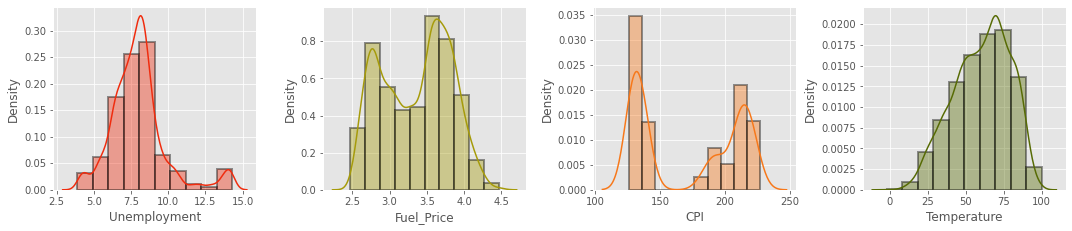

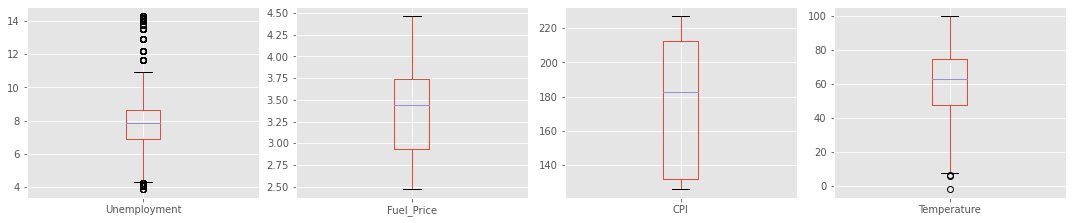

In [14]:
n=4
clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(valuesFeature)/n)])
for i in range(len(valuesFeature)):
    plt.subplot(math.ceil(len(valuesFeature)/3),n,i+1)
    sns.distplot(df_tratado[valuesFeature[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(valuesFeature)/n)])
for i in range(len(valuesFeature)):
    plt.subplot(math.ceil(len(valuesFeature)/3),n,i+1)
    df_tratado.boxplot(valuesFeature[i])
plt.tight_layout()
plt.show()